In [ ]:
!pip3 install pillow python-docx python-pptx matplotlib

In [21]:
import ppt
import doc
import docx
import pptx
from ppt import is_bold, is_term, is_underlined

docx_doc = docx.Document("./test.docx")
pptx_doc = pptx.Presentation("./test.pptx")

doc_data = doc.main(docx_doc)
ppt_data = ppt.main(pptx_doc)

print(doc_data)
print(ppt_data)


['Deductive Reasoning', 'this is a definition', 'Inductive Reasoning', '2nd line definition']
['Deductive Reasoning ', 'involves essentially the reverse process — arriving at specific conclusions based on general principles, observations, or experiences (i.e., generalizations)', 'Inductive Reasoning ', 'involves developing generalizations based on observation of a limited number of related events or experiences.']


In [5]:
import requests
import json

URL = "https://api.duckduckgo.com/"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:101.0) Gecko/20100101 Firefox/101.0'
}

query = ppt_data[0]
# query = 'steam'

data = {
    'format': 'json',
    'no_html': 1,
    'no_redirect': 1,
    'kp': 1,
    'q': query
}


response = requests.get(URL, params=data, headers=headers).json()

# print(response)
partial_response = f"Online Result: {response['Abstract'][:300]}..." if response['Abstract'] != "" else ""
# print(f"Online Result: {response['Abstract'][:150]}..." if response['Abstract'] != "" else False)

print(partial_response)


Online Result: Deductive reasoning is the mental process of drawing deductive inferences. An inference is deductively valid if its conclusion follows logically from its premises, i.e. if it is impossible for the premises to be true and the conclusion to be false. For example, the inference from the premises "all m...


['Deductive Reasoning ', 'Inductive Reasoning ']
['involves essentially the reverse process — arriving at specific conclusions based on general principles, observations, or experiences (i.e., generalizations)', 'involves developing generalizations based on observation of a limited number of related events or experiences.']
Length of terms: 2
Length of definitions: 2


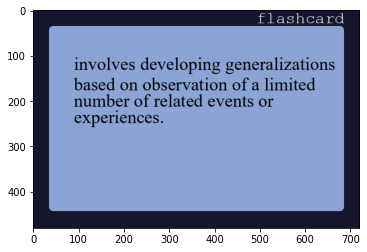

In [40]:
from PIL import Image, ImageFont, ImageDraw
from io import BytesIO
import textwrap

from matplotlib.pyplot import imshow
import numpy as np

# Specific width x height for now
w = 720
h = 480

# Create blank white image
# RGBA = PNG 
# background = Image.new("RGBA", (w, h), (255, 255, 255, 255))

array_of_terms = []
array_of_definitions = []

ctr = 0
for t in ppt_data:
    if ctr % 2 == 0:
        array_of_terms.append(t)
    elif ctr % 2 == 1:
        array_of_definitions.append(t)
    ctr += 1
    

print(array_of_terms)
print(array_of_definitions)

print(f"Length of terms: {len(array_of_terms)}")
print(f"Length of definitions: {len(array_of_definitions)}")
del ctr
ctr = 0
while ctr < len(array_of_terms) or ctr < len(array_of_definitions):
    # Load image template
    background = Image.open("./flashcard-template.png")
    question = Image.open("./flashcard-template.png")

    # Set font family and size
    font1 = ImageFont.truetype("./times.ttf", 32)
    font2 = ImageFont.truetype("./times.ttf", 24)
    font3 = ImageFont.truetype("./times.ttf", 16)
    # Font 4 is for the question card
    font4 = ImageFont.truetype("./times.ttf", 40)

    # Draw/create blank white image
    I1 = ImageDraw.Draw(background)
    I2 = ImageDraw.Draw(question)

    # Add text
    I1.text((w*0.0694, h*0.108), array_of_terms[ctr], font=font1, fill=(0, 0, 0), resample=Image.ANTIALIAS)

    # Wrap text 
    offset_w = w * 0.0694
    offset_h = h * 0.3
    for line in textwrap.wrap(array_of_definitions[ctr], width=60):
        I1.text((offset_w, offset_h), line, font=font2, fill=(0, 0, 0), resample=Image.ANTIALIAS)
        offset_h += font2.getsize(line)[1]

    # Another wrap text
    offset_w = w * 0.0694
    offset_h = h * 0.7291
    for line in textwrap.wrap(partial_response, width=100):
        I1.text((offset_w, offset_h), line, font=font3, fill=(0, 0, 0), resample=Image.ANTIALIAS)
        offset_h += font3.getsize(line)[1]

    # For the question card
    offset_w = w * 0.125
    offset_h = h * 0.2
    for line in textwrap.wrap(array_of_definitions[1], width=35):
        I2.text((offset_w, offset_h), line, font=font4, fill=(0, 0, 0), resample=Image.ANTIALIAS)
        offset_h += font4.getsize(line)[1]

    # Output image/show image in jupyter notebook
    background.save(f"output-full{ctr}.png")
    question.save(f"output-question{ctr}.png")
    # imshow(np.asarray(background))
    imshow(np.asarray(question))
    
    ctr += 1
